In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
csv_file_path = '/Users/lucanozzoli/UTFPR/sistemas_inteligentes/Sistemas-Inteligentes-ML/treino_sinais_vitais_com_label.csv'
data = pd.read_csv(csv_file_path,
                   names=['id', 
                          'pSist', 
                          'pDiast', 
                          'qPA', 
                          'pulso', 
                          'resp', 
                          'gravid', 
                          'classe'])
data

,id,pSist,pDiast,qPA,pulso,resp,gravid,classe
0,1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000,2
1,2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530427,2
2,3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730745,3
3,4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679911,2
4,5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...,...,...,...
1495,1496,17.151411,6.020803,4.774128,6.701052,7.380529,24.494467,1
1496,1497,13.114511,12.500453,8.400144,81.203081,13.630509,65.385011,3
1497,1498,17.976320,6.054430,4.768427,143.261527,21.843486,24.530704,1
1498,1499,12.640997,5.852639,1.707746,184.267283,14.256125,61.062546,3


In [71]:
#Data cleaning

clean_data = data.drop(['id', 
                       'pSist', 
                       'pDiast'],axis=1)
                       

In [72]:
clean_data

,qPA,pulso,resp,gravid,classe
0,8.416754,75.921057,21.635259,40.000000,2
1,8.725890,63.813564,19.718734,41.530427,2
2,0.000000,197.210213,19.045471,52.730745,3
3,8.733333,143.636181,17.621141,34.679911,2
4,1.747626,82.636672,12.209535,69.375882,3
...,...,...,...,...,...
1495,4.774128,6.701052,7.380529,24.494467,1
1496,8.400144,81.203081,13.630509,65.385011,3
1497,4.768427,143.261527,21.843486,24.530704,1
1498,1.707746,184.267283,14.256125,61.062546,3


In [73]:
# Separate features (X) and target (y)
X = clean_data.drop(['gravid','classe'], axis=1)  # Replace 'target_column' with your target column
y = clean_data['classe']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [74]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9133333333333333
Precision: 0.859543448250389
Recall: 0.9330288005917297


In [75]:
# Evaluate the model

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98        46
           2       0.93      0.94      0.93       171
           3       0.86      0.82      0.84        77
           4       0.67      1.00      0.80         6

    accuracy                           0.91       300
   macro avg       0.86      0.93      0.89       300
weighted avg       0.92      0.91      0.91       300



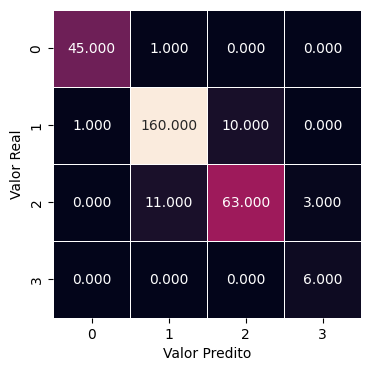

In [76]:
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidths=0.5, square=True, cbar=False)
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.show()